<a href="https://colab.research.google.com/github/babyraggge/time-data-prediction-methods/blob/main/practice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическое задание №1
* Бельтюков Михаил
* РИ-481223
* Вариант 1

In [2]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt

from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import skew
from scipy.stats import kurtosis

import h5py

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


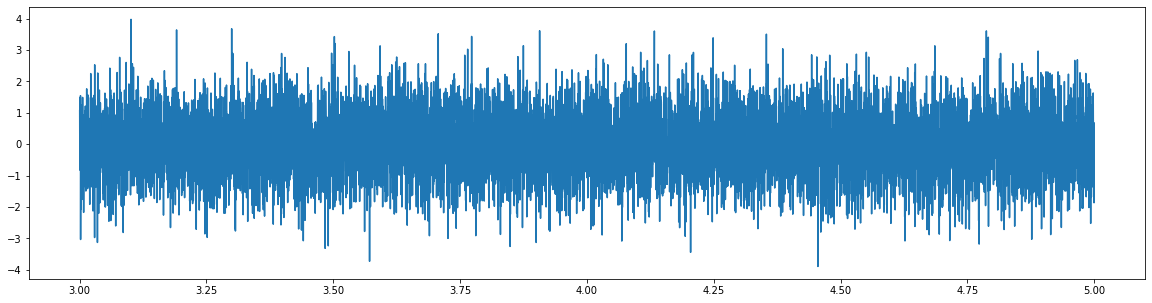

In [22]:
# Генерируем случайный ВР
X = rand.randn(10000)
t = np.linspace(3, 5, num = 10000)
plt.figure(figsize= (20, 5))
plt.plot(t, X);

In [5]:
# Расчитываем мат. ожидание для ВР
M = np.mean(X)
M_manual = np.sum(X) / X.shape[0]
print("Результат применения функции mean(): ", M)
print("Расчитанное мат. ожидание для ВР: ", M_manual)

Результат применения функции mean():  -0.013026310991302713
Расчитанное мат. ожидание для ВР:  -0.013026310991302713


In [6]:
# Расчитываем дисперсию для ВР
D = np.var(X)
D_manual = np.sum((X - M)**2) / X.shape[0]
print("Результат применения функции var(): ", D)
print("Расчитанная дисперсия для ВР: ", D_manual)

Результат применения функции var():  1.000022946135594
Расчитанная дисперсия для ВР:  1.000022946135594


In [7]:
# Расчитываем ассиметрию для ВР
a = skew(X)
a_manual = np.sum((X - M)**3) / (X.shape[0] * D**3)
print("Результат применения функции skew(): ", a)
print("Ассиметрия ВР: ", a_manual)

Результат применения функции skew():  -0.011659457913040287
Ассиметрия ВР:  -0.011659056615297272


In [8]:
# Расчитываем эксцесс для ВР
e = kurtosis(X, fisher= False)
e_manual = np.sum((X - M)**4) / (X.shape[0] * D**5)
print("Результат применения функции kurtosis(): ", e)
print("Эксцесс  ВР: ", e_manual)

Результат применения функции kurtosis():  3.0312549615277553
Эксцесс  ВР:  3.031046304341479


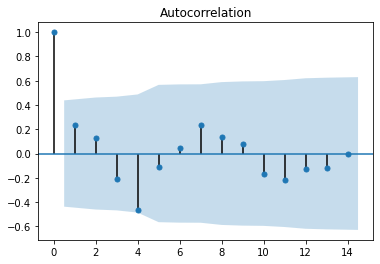

In [9]:
# Строим коррелограмму при помощи библиотечной функции plot_acf()
plot_acf(X[0:20]);

In [10]:
# Оценка автокорреляционной функции
def autocorr_estimator(x, lag):
  return np.mean(
      ((x[:len(x)-lag] - np.mean(x)) * (x[lag:] - np.mean(x)))[:len(x)-lag]
  )

# Кооэфициент автокорреляции
def autocorr_coef(x, lag):
  return autocorr_estimator(x, lag) / autocorr_estimator(x, 0)

In [15]:
# Строим коррелограмму при помощи объявленных ранее функций
def draw_autocorrealtion_plot(x, last_lag=20):
  lags = [i for i in range(last_lag + 1)]
  plt.plot(lags, list(map(lambda lag: autocorr_coef(x, lag), lags)))
  plt.grid()
  plt.title("Autocorrealtion")
  plt.xlabel("Lag")

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


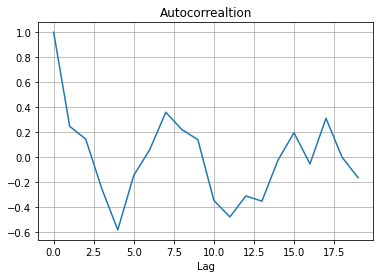

In [16]:
draw_autocorrealtion_plot(X[0:20]);

In [26]:
# В соотвествие с заднием, объявляем единую функцию, которая вычисяет 
# мат.  ожидание,  дисперсию, асимметрию, эксцесс и строит АКФ
def make_lab1(x):
  M = np.sum(x) / X.shape[0]
  D = np.sum((x - M)**2) / x.shape[0]
  a = np.sum((x - M)**3) / (x.shape[0] * D**3)
  e = np.sum((x - M)**4) / (x.shape[0] * D**5)
  draw_autocorrealtion_plot(x)

  print("Мат. ожидание для ВР: ", M)
  print("Дисперсия для ВР: ", D)
  print("Ассиметрия ВР: ", a)
  print("Эксцесс  ВР: ", e)

In [27]:
Xmat = h5py.File('1.mat', 'r') 
Xmat = Xmat.get('z1') 
Xmat = np.array(Xmat)
print(Xmat[:10])
print(Xmat.shape)

[[ 0.2       ]
 [ 0.15425072]
 [-0.44984571]
 [ 0.57351336]
 [-0.14141354]
 [-0.19475003]
 [ 0.45338184]
 [-0.09671688]
 [ 0.22884411]
 [-0.05369354]]
(128, 1)


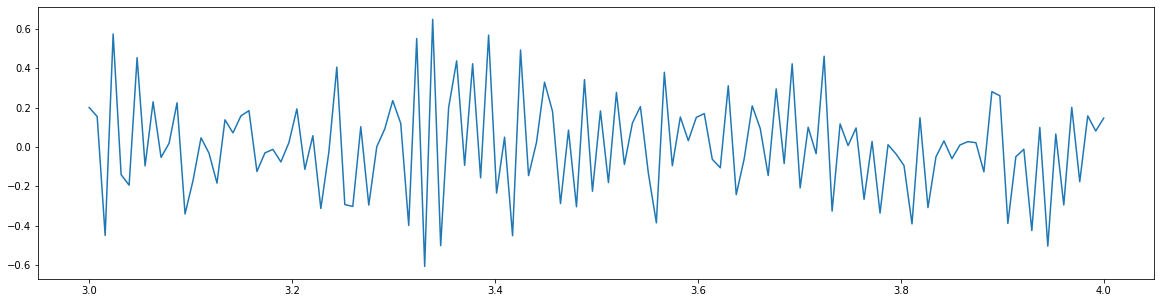

In [28]:
plt.figure(figsize= (20, 5))
plt.plot(np.linspace(3, 4, num=Xmat.shape[0]), Xmat);

Анализируя базовые характеристики ВР, можно сделать вывод, что самым большим по модулю значением коофициента автокорреляции является в при лаге 1, что говорит о наличии в ВР тренда, который имеет убывающий характер. После первого лага самым высоким значением обладает коэффициент автокорреляции при лаге 2. Это значит, что для каждой точки через одну наблюдается некоторая зависимость, именно "скачущие" через одну точку значения.

Мат. ожидание для ВР:  9.850835879190787e-05
Дисперсия для ВР:  0.06397159022532793
Ассиметрия ВР:  11.30932050434886
Эксцесс  ВР:  10666.330153567274


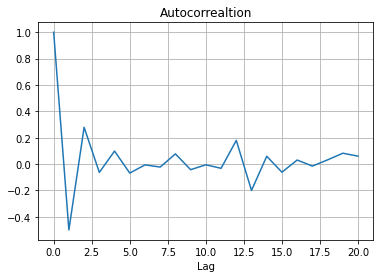

In [29]:
make_lab1(Xmat)